#Mounting

In [ ]:
from google.colab import drive

# Check if the directory is already mounted
import os
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print("Google Drive is already mounted!")

Mounted at /content/drive


#Find no. of files

In [ ]:
import os

def count_all_files(directory):
    total_files = 0
    folder_file_count = {}  # Dictionary to store file count per folder

    for root, dirs, files in os.walk(directory):
        file_count = len(files)
        total_files += file_count
        folder_file_count[root] = file_count  # Store count for each folder

    return total_files, folder_file_count

folder_path = "/content/drive/MyDrive/SVM/audio_preprocessing/inaudible/" # Replace with your target directory
total, per_folder = count_all_files(folder_path)

print(f"Total number of files: {total}\n")
print("Files per folder:")
for folder, count in per_folder.items():
    print(f"Folder: {folder} -> {count} file{'s' if count != 1 else ''}")

Total number of files: 4998

Files per folder:
Folder: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ -> 4998 files


#Moving files

In [ ]:
import os
import shutil

# Define source and destination directories
audio_dir = "/content/drive/MyDrive/SVM/training_dataset/audible/"
destination_dir = "/content/drive/MyDrive/SVM/ultrasonic_conversion/audible/"

# Ensure destination folder exists
os.makedirs(destination_dir, exist_ok=True)

# Get the audio files
audio_files = [f for f in os.listdir(audio_dir) if f.endswith(".wav")]

# Move the files to the new folder
for file_name in audio_files:
    source_path = os.path.join(audio_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    shutil.copy(source_path, destination_path)
    print(f"Moved {file_name} to {destination_dir}")

Moved 86c0b1d0-4501-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 9b391630-450a-11e9-9539-7f047cfe24d1.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 718164e0-4501-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 4bb10640-4500-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 4efef8c0-4500-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 8c8ac7e0-4501-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 60162a60-4501-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 745a2760-4501-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 68b46f10-4501-11e9-a1ea-79ca03012c0e.wav to /content/drive/MyDrive/SVM/ultrasonic_conversion/audible/
Moved 8358a7a0-4501-11e9-a1e

# **TRAINING**

#Ultrasonic conversion using amplitude modulation

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.io.wavfile import write
import librosa
import os

def amplitude_modulate(input_audio, carrier_freq, sampling_rate):

    t = np.arange(len(input_audio)) / sampling_rate

    carrier_signal = np.cos(2 * np.pi * carrier_freq * t)

    modulated_audio = input_audio * carrier_signal

    return modulated_audio

def highpass_filter(data, cutoff, fs, order=5):

    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="high", analog=False)
    filtered_audio = filtfilt(b, a, data)
    return filtered_audio

audio_dir = "/content/drive/MyDrive/SVM/training_dataset/inaudible/"
output_dir =  "/content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/"
os.makedirs(output_dir, exist_ok=True)

audio_files = [f for f in os.listdir(audio_dir) if f.endswith(".wav")]

for file_name in audio_files:
    file_path = os.path.join(audio_dir, file_name)
    if os.path.exists(file_path):
        audible_audio, sr = librosa.load(file_path, sr=96000)
        carrier_frequency = 25000
        ultrasonic_audio = amplitude_modulate(audible_audio, carrier_frequency, sr)
        ultrasonic_audio_filtered = highpass_filter(ultrasonic_audio, cutoff=20000, fs=sr)
        output_path = os.path.join(output_dir, f"ultrasonic_{file_name}")
        write(output_path, sr, (ultrasonic_audio_filtered * 32767).astype(np.int16))
        print(f"Processed and saved: {output_path}")
    else:
        print(f"Error: File not found at {file_path}")

Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_fab45250-44e2-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_f4ea46d0-44e3-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_fb307210-44e0-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_ed165e60-44e0-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_f78125b0-44e0-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_e85e1b90-44e2-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_fb9d8ef0-44e4-11e9-bb82-bdba769643e7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudi

#Checking frequency of converted (ultrasonic) audios

In [ ]:
import os
import numpy as np
import scipy.signal
import librosa

def analyze_audio_power_spectrum(folder_path):

    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    if not audio_files:
        print("No audio files found in the folder!")
        return

    for file in audio_files:
        file_path = os.path.join(folder_path, file)
        y, sr = librosa.load(file_path, sr=None)  # Keep original sampling rate
        freqs, power = scipy.signal.periodogram(y, sr)
        significant_freqs = freqs[power > np.max(power) * 0.1]

        if significant_freqs.size > 0:
            min_freq = significant_freqs.min()
            max_freq = significant_freqs.max()
        else:
            min_freq, max_freq = 0, 0

        print(f"📂 File: {file}")
        print(f"   📢 Sample Rate: {sr} Hz")
        print(f"   🔍 Min Frequency with Significant Power: {min_freq:.2f} Hz")
        print(f"   🔍 Max Frequency with Significant Power: {max_freq:.2f} Hz")
        print("-" * 50)

folder_path = "/content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/"
analyze_audio_power_spectrum(folder_path)

Streaming output truncated to the last 5000 lines.
📂 File: ultrasonic_c3b50310-44da-11e9-a8b6-e96f2628bf65.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 23069.44 Hz
   🔍 Max Frequency with Significant Power: 26936.34 Hz
--------------------------------------------------
📂 File: ultrasonic_ac945680-44db-11e9-a8b6-e96f2628bf65.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 23470.83 Hz
   🔍 Max Frequency with Significant Power: 26531.25 Hz
--------------------------------------------------
📂 File: ultrasonic_02dfc550-4451-11e9-beaa-1f3e1eab7bff.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 21581.00 Hz
   🔍 Max Frequency with Significant Power: 28421.46 Hz
--------------------------------------------------
📂 File: ultrasonic_01184130-4450-11e9-beaa-1f3e1eab7bff.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 24616.88 Hz
   🔍 Max Frequency with Significant Power: 25383.12 Hz
--------

In [ ]:
!pip install noisereduce

#Audio preprocessing

In [ ]:
import os
import numpy as np
import librosa
import soundfile as sf
import noisereduce as nr

# 🔹 Base directories
base_input_dir = "/content/drive/MyDrive/SVM/ultrasonic_conversion/"
base_output_dir = "/content/drive/MyDrive/SVM/audio_preprocessing/"  # New output folder

audible_dir = os.path.join(base_input_dir, "audible")
inaudible_dir = os.path.join(base_input_dir, "inaudible")

processed_audible_dir = os.path.join(base_output_dir, "audible")
processed_inaudible_dir = os.path.join(base_output_dir, "inaudible")

# 🔹 Define processing parameters
TARGET_LENGTH = 1.5  # Normalized length in seconds
AUDIBLE_SR = 16000  # Sampling rate for audible files
INAUDIBLE_SR = 96000  # Sampling rate for inaudible files

def preprocess_audio(file_path, target_length, sr):
    """
    Preprocess an audio file:
    1️⃣ Noise Reduction
    2️⃣ Silence Removal
    3️⃣ Length Normalization (Padding/Truncation)
    """
    # 🎵 Load audio
    y, sr = librosa.load(file_path, sr=sr)

    # 🔹 1️⃣ Noise Reduction
    y_denoised = nr.reduce_noise(y=y, sr=sr)

    # 🔹 2️⃣ Silence Removal (Using Split)
    non_silent_intervals = librosa.effects.split(y_denoised, top_db=35)
    y_trimmed = np.concatenate([y_denoised[start:end] for start, end in non_silent_intervals])

    # 🔹 3️⃣ Length Normalization
    target_samples = int(sr * target_length)  # Convert seconds to samples
    if len(y_trimmed) > target_samples:
        y_final = y_trimmed[:target_samples]  # Truncate
    else:
        y_final = np.pad(y_trimmed, (0, max(0, target_samples - len(y_trimmed))), mode="constant")  # Pad

    return y_final, sr

def process_audio_folder(input_folder, output_folder, sample_rate):
    """
    Process all `.wav` files in a given folder and save to a new output folder.
    """
    if not os.path.exists(input_folder):
        print(f"🚨 Folder not found: {input_folder}")
        return

    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

    audio_files = [f for f in os.listdir(input_folder) if f.endswith(".wav")]
    if not audio_files:
        print(f"⚠️ No audio files found in: {input_folder}")
        return

    for file_name in audio_files:
        input_file = os.path.join(input_folder, file_name)
        output_file = os.path.join(output_folder, file_name)  # Save in output folder

        # 🔥 Process audio
        processed_audio, sr = preprocess_audio(input_file, TARGET_LENGTH, sample_rate)

        # 💾 Save the processed file in the output directory
        sf.write(output_file, processed_audio, sr)
        print(f"✅ Processed & Saved: {output_file}")

# 🔹 Process both audible & inaudible folders
process_audio_folder(audible_dir, processed_audible_dir, AUDIBLE_SR)  # 16kHz for audible
process_audio_folder(inaudible_dir, processed_inaudible_dir, INAUDIBLE_SR)  # 96kHz for inaudible

print("🎯 All files processed successfully!")

Streaming output truncated to the last 5000 lines.
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible/eea1e920-451c-11e9-9035-7943ec3b842a.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_c3b50310-44da-11e9-a8b6-e96f2628bf65.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_ac945680-44db-11e9-a8b6-e96f2628bf65.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_02dfc550-4451-11e9-beaa-1f3e1eab7bff.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_01184130-4450-11e9-beaa-1f3e1eab7bff.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_1483b550-444c-11e9-beaa-1f3e1eab7bff.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_1670df50-444c-11e9-beaa-1f3e1eab7bff.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audi

##Before and after the audio preprocessing (audible)

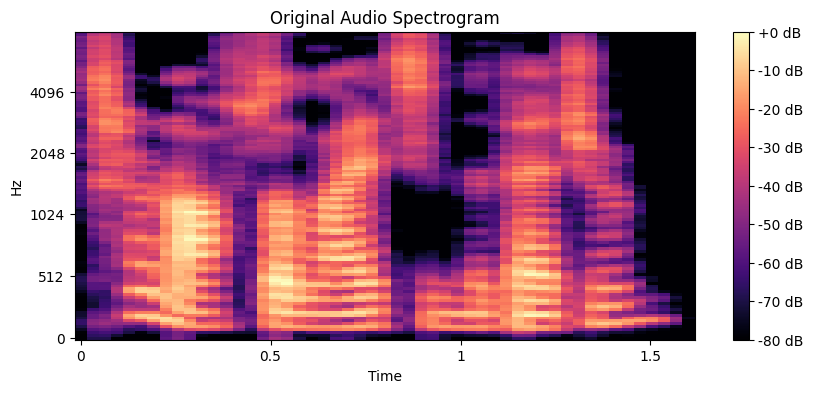

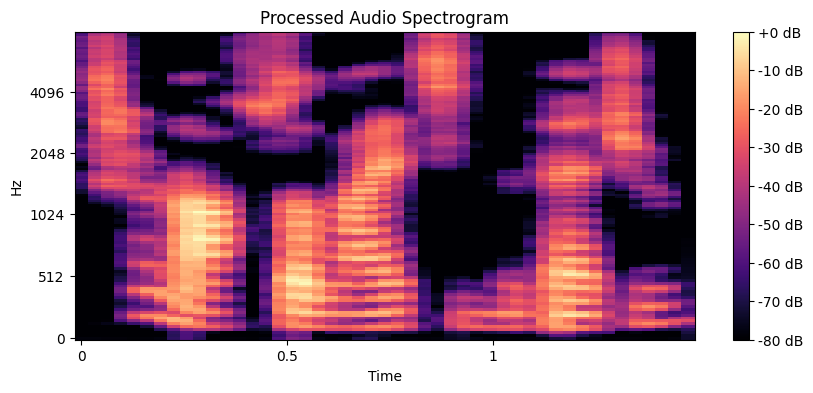

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

def plot_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Compare original and processed spectrograms
plot_spectrogram("/content/drive/MyDrive/SVM/ultrasonic_conversion/audible/0a4a3430-446d-11e9-beaa-1f3e1eab7bff.wav", "Original Audio Spectrogram")
plot_spectrogram("/content/drive/MyDrive/SVM/audio_preprocessing/audible/0a4a3430-446d-11e9-beaa-1f3e1eab7bff.wav", "Processed Audio Spectrogram")

#Before and after the audio preprocessing (inaudible)

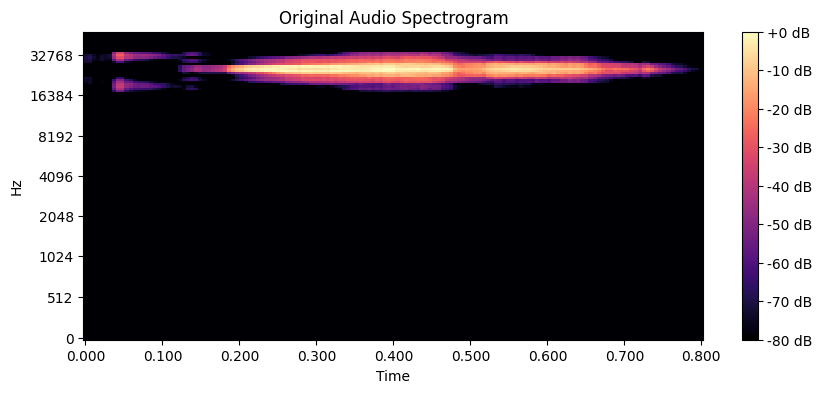

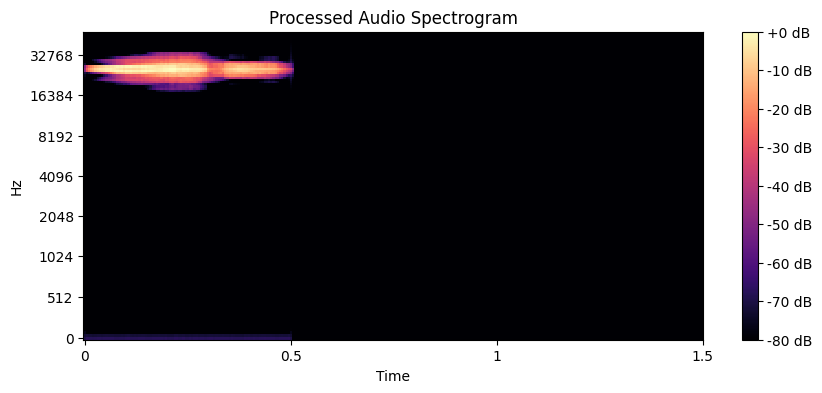

In [ ]:
def plot_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Compare original and processed spectrograms
plot_spectrogram("/content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible/ultrasonic_0a4a19d0-4541-11e9-b1e4-e5985dca719e.wav", "Original Audio Spectrogram")
plot_spectrogram("/content/drive/MyDrive/SVM/audio_preprocessing/inaudible/ultrasonic_0a4a19d0-4541-11e9-b1e4-e5985dca719e.wav", "Processed Audio Spectrogram")

#Framing (Overlapping)

In [ ]:
import os
import librosa
import numpy as np

def frame_signal(y, sr, frame_duration=0.025, overlap=0.5):
    """
    Frames an audio signal based on a fixed time duration instead of a fixed sample count.

    Parameters:
        y (numpy.ndarray): The audio signal.
        sr (int): Sampling rate of the signal.
        frame_duration (float): Frame length in seconds (default 25ms).
        overlap (float): Overlap ratio between frames (default 50%).

    Returns:
        numpy.ndarray: 2D array where each column is a framed segment.
    """
    frame_size = int(sr * frame_duration)  # Convert duration to samples
    hop_size = int(frame_size * (1 - overlap))  # Calculate hop size based on overlap

    # Convert to frames
    frames = librosa.util.frame(y, frame_length=frame_size, hop_length=hop_size)

    return frames

def process_audio_folder(folder_path, target_sr, output_folder):
    """
    Processes all audio files in a folder, applies framing, and saves the frames as .npy files.

    Parameters:
        folder_path (str): Path to the folder containing audio files.
        target_sr (int): Sampling rate to load audio files.
        output_folder (str): Folder to save framed numpy arrays.
    """
    os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    for file in audio_files:
        file_path = os.path.join(folder_path, file)
        y, sr = librosa.load(file_path, sr=target_sr)  # Load audio with target sampling rate
        frames = frame_signal(y, sr)  # Apply framing

        # Save framed data as .npy file
        output_file = os.path.join(output_folder, file.replace('.wav', '.npy'))
        np.save(output_file, frames)

        print(f"Processed {file}: Frames shape {frames.shape}")

# Define folder paths
audible_folder = "/content/drive/MyDrive/SVM/audio_preprocessing/audible/"      # Folder containing audible signals (16kHz)
inaudible_folder = "/content/drive/MyDrive/SVM/audio_preprocessing/inaudible/"  # Folder containing inaudible signals (96kHz)

# Define output folders
audible_output = "/content/drive/MyDrive/SVM/framing/audible/"
inaudible_output = "/content/drive/MyDrive/SVM/framing/inaudible/"

# Process folders
process_audio_folder(audible_folder, 16000, audible_output)
process_audio_folder(inaudible_folder, 96000, inaudible_output)

print("Framing complete for all files!")

Streaming output truncated to the last 5000 lines.
Processed eea1e920-451c-11e9-9035-7943ec3b842a.wav: Frames shape (400, 119)
Processed ultrasonic_c3b50310-44da-11e9-a8b6-e96f2628bf65.wav: Frames shape (2400, 119)
Processed ultrasonic_ac945680-44db-11e9-a8b6-e96f2628bf65.wav: Frames shape (2400, 119)
Processed ultrasonic_02dfc550-4451-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_01184130-4450-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_1483b550-444c-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_1670df50-444c-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_190c0a50-4451-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_1a9e4a70-444e-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_09582420-444e-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400, 119)
Processed ultrasonic_1cf1b050-444e-11e9-beaa-1f3e1eab7bff.wav: Frames shape (2400

#Windowing

In [ ]:
import numpy as np
import os

# Define input and output folder paths separately
audible_input_path = "/content/drive/MyDrive/SVM/framing/audible/"  # Update with your folder path
inaudible_input_path = "/content/drive/MyDrive/SVM/framing/inaudible/"  # Update with your folder path

audible_output_path = "/content/drive/MyDrive/SVM/windowing/audible/"  # Update with your output folder
inaudible_output_path = "/content/drive/MyDrive/SVM/windowing/inaudible/" # Update with your output folder

# Ensure output directories exist
os.makedirs(audible_output_path, exist_ok=True)
os.makedirs(inaudible_output_path, exist_ok=True)

def apply_hamming_window(input_folder, output_folder):
    """Apply Hamming windowing to all .npy files in the input folder and save them."""
    file_list = [f for f in os.listdir(input_folder) if f.endswith(".npy")]

    batch_size = 1000  # Adjust for large datasets

    for i in range(0, len(file_list), batch_size):
        batch_files = file_list[i:i + batch_size]  # Process files in batches

        for file_name in batch_files:
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            framed_data = np.load(input_path, mmap_mode='r')  # Memory-mapped loading
            window = np.hamming(framed_data.shape[1])  # Create Hamming window
            windowed_data = framed_data * window  # Apply windowing

            np.save(output_path, windowed_data)  # Save processed data

        print(f"Processed batch {i//batch_size + 1}/{(len(file_list) // batch_size) + 1} in {input_folder}")

print("Processing Audible files...")
apply_hamming_window(audible_input_path, audible_output_path)

print("Processing Inaudible files...")
apply_hamming_window(inaudible_input_path, inaudible_output_path)

print("Hamming windowing applied to all files successfully!")

Processing Audible files...
Processed batch 1/5 in /content/drive/MyDrive/SVM/framing/audible/
Processed batch 2/5 in /content/drive/MyDrive/SVM/framing/audible/
Processed batch 3/5 in /content/drive/MyDrive/SVM/framing/audible/
Processed batch 4/5 in /content/drive/MyDrive/SVM/framing/audible/
Processed batch 5/5 in /content/drive/MyDrive/SVM/framing/audible/
Processing Inaudible files...
Processed batch 1/5 in /content/drive/MyDrive/SVM/framing/inaudible/
Processed batch 2/5 in /content/drive/MyDrive/SVM/framing/inaudible/
Processed batch 3/5 in /content/drive/MyDrive/SVM/framing/inaudible/
Processed batch 4/5 in /content/drive/MyDrive/SVM/framing/inaudible/
Processed batch 5/5 in /content/drive/MyDrive/SVM/framing/inaudible/
Hamming windowing applied to all files successfully!


#Feature Extraction

In [ ]:
import os
import numpy as np
import librosa
import librosa.feature
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Function to extract features from an .npy file
def extract_features(file_path, sr):
    data = np.load(file_path)  # Load framed & windowed audio
    print(f"Loaded {file_path}, Shape: {data.shape}")  # Debugging print

    if data.ndim > 1:
        y = data.flatten()  # Convert 2D framed signal into 1D
    else:
        y = data  # Already 1D

    # Spectral features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Temporal features
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    energy = np.square(y).mean()
    entropy = -np.sum(y**2 * np.log2(y**2 + 1e-10))

    # Compute statistical features (Mean, Variance, Skewness, Kurtosis)
    def stats(feature):
        return [np.mean(feature), np.var(feature), np.mean(feature**3), np.mean(feature**4)]

    features = []
    for f in [mfccs, spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rolloff, zero_crossing_rate]:
        features.extend(stats(f))

    features.append(energy)
    features.append(entropy)

    return np.array(features)

# Function to process all .npy files in a folder
def process_dataset(folder, label, sr):
    data = []
    labels = []
    for file in os.listdir(folder):
        if file.endswith(".npy"):  # Process .npy files only
            file_path = os.path.join(folder, file)
            features = extract_features(file_path, sr)
            data.append(features)
            labels.append(label)
    return np.array(data), np.array(labels)

# Set directories for audible and inaudible signals
audible_dir = "/content/drive/MyDrive/SVM/windowing/audible/"
inaudible_dir = "/content/drive/MyDrive/SVM/windowing/inaudible/"

# Extract features from both classes with correct sample rates
audible_features, audible_labels = process_dataset(audible_dir, label=1, sr=16000)
inaudible_features, inaudible_labels = process_dataset(inaudible_dir, label=0, sr=96000)

# Combine datasets
X = np.vstack((audible_features, inaudible_features))
y = np.concatenate((audible_labels, inaudible_labels))

# Apply Feature Selection using SVM-based RFE
estimator = SVC(kernel="linear")  # SVM with linear kernel
selector = RFE(estimator, n_features_to_select=30)  # Select 30 best features
X_selected = selector.fit_transform(X, y)

# Print selected feature indices
selected_features = np.where(selector.support_)[0]
print(f"Selected Features Index: {selected_features}")

# Normalize selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
joblib.dump(scaler, "/content/drive/MyDrive/SVM/trained_model/scaler.pkl")  # Save the scaler for future use

# Save extracted & selected features
np.savez("/content/drive/MyDrive/SVM/feature_extraction/extracted_audio_features.npz", X=X_scaled, y=y)
print("Feature extraction and selection completed. Extracted features saved in 'extracted_audio_features.npz'.")

Streaming output truncated to the last 5000 lines.
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_ac945680-44db-11e9-a8b6-e96f2628bf65.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_02dfc550-4451-11e9-beaa-1f3e1eab7bff.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_01184130-4450-11e9-beaa-1f3e1eab7bff.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_1483b550-444c-11e9-beaa-1f3e1eab7bff.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_1670df50-444c-11e9-beaa-1f3e1eab7bff.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_190c0a50-4451-11e9-beaa-1f3e1eab7bff.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_1a9e4a70-444e-11e9-beaa-1f3e1eab7bff.npy, Shape: (2400, 119)
Loaded /content/drive/MyDrive/SVM/windowing/inaudible/ultrasonic_09

#Linear SVM Accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)

# Evaluate
y_pred = svm_linear.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Linear SVM Accuracy: {acc:.2f}")

# If accuracy is LOW, data is likely NON-LINEAR

Linear SVM Accuracy: 1.00


#Testing using training dataset

In [ ]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the extracted and selected features
data = np.load("/content/drive/MyDrive/SVM/feature_extraction/extracted_audio_features.npz")
X = data["X"]  # Selected feature set
y = data["y"]  # Labels (1 = Audible, 0 = Inaudible)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train an SVM model
svm_model = SVC(kernel="linear", C=1.0)  # Linear SVM (since we assume features are linearly separable)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(svm_model, "/content/drive/MyDrive/SVM/trained_model/svm_model.pkl")
print("SVM model saved successfully!")

Test Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

SVM model saved successfully!


#Training and testing accuracy (using training dataset)

In [ ]:
# Training accuracy
train_acc = svm_model.score(X_train, y_train)

# Testing accuracy
test_acc = svm_model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.2%}")
print(f"Testing Accuracy: {test_acc:.2%}")

if train_acc - test_acc > 0.1:
    print("⚠️ Warning: Possible Overfitting Detected!")

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


# **TESTING**

#Ultrasonic Conversion using Amplitude Modulation

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.io.wavfile import write
import librosa
import os

def amplitude_modulate(input_audio, carrier_freq, sampling_rate):
    """
    Apply amplitude modulation to shift the audio signal to an ultrasonic frequency.

    Parameters:
    - input_audio: np.array, the audible audio signal.
    - carrier_freq: int, the frequency of the carrier (ultrasonic).
    - sampling_rate: int, the sampling rate of the signal.

    Returns:
    - modulated_audio: np.array, the amplitude modulated audio signal.
    """
    # Create time vector
    t = np.arange(len(input_audio)) / sampling_rate

    # Create the carrier signal (a high-frequency sinusoidal wave)
    carrier_signal = np.cos(2 * np.pi * carrier_freq * t)

    # Perform amplitude modulation (modulate the carrier with the input audio)
    modulated_audio = input_audio * carrier_signal

    return modulated_audio

def highpass_filter(data, cutoff, fs, order=5):
    """
    Apply a high-pass filter to remove residual audible frequencies.

    Parameters:
    - data: np.array, the input audio signal.
    - cutoff: int, the cutoff frequency in Hz (e.g., 20,000 Hz).
    - fs: int, the sampling rate of the signal.
    - order: int, the order of the filter.

    Returns:
    - filtered_audio: np.array, the high-pass filtered signal.
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="high", analog=False)
    filtered_audio = filtfilt(b, a, data)
    return filtered_audio

# Load the normal audible audio
# Process audio files
audio_dir = "/content/drive/MyDrive/SVM/testing_dataset/inaudible/"
output_dir =  "/content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/"
os.makedirs(output_dir, exist_ok=True)

audio_files = [f for f in os.listdir(audio_dir) if f.endswith(".wav")]

for file_name in audio_files:
    file_path = os.path.join(audio_dir, file_name)
    if os.path.exists(file_path):
        audible_audio, sr = librosa.load(file_path, sr=96000)  # Set a high sampling rate
        carrier_frequency = 25000  # Carrier frequency (e.g., 25 kHz)
        ultrasonic_audio = amplitude_modulate(audible_audio, carrier_frequency, sr)
        ultrasonic_audio_filtered = highpass_filter(ultrasonic_audio, cutoff=20000, fs=sr)
        output_path = os.path.join(output_dir, f"ultrasonic_{file_name}")
        write(output_path, sr, (ultrasonic_audio_filtered * 32767).astype(np.int16))
        print(f"Processed and saved: {output_path}")
    else:
        print(f"Error: File not found at {file_path}")

Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_Q3.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_Q4.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R1.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R2.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R3.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R4.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R5.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R6.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_R7.wav
Processed and saved: /content/drive/MyDrive/SVM/ultrasonic_conversion/ina

#Checking the frequency of the converted (ultrasonic) audios

In [ ]:
import os
import numpy as np
import scipy.signal
import librosa

def analyze_audio_power_spectrum(folder_path):
    """
    Process all `.wav` files in a folder, compute their power spectrum,
    and find the minimum and maximum significant frequencies.

    Parameters:
        folder_path (str): Path to the folder containing `.wav` files.
    """
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    if not audio_files:
        print("🚨 No audio files found in the folder!")
        return

    for file in audio_files:
        file_path = os.path.join(folder_path, file)

        # Load the audio with its original sample rate
        y, sr = librosa.load(file_path, sr=None)  # Keep original sampling rate

        # Compute the power spectrum
        freqs, power = scipy.signal.periodogram(y, sr)

        # Identify significant frequency range (above 10% of max power)
        significant_freqs = freqs[power > np.max(power) * 0.1]

        if significant_freqs.size > 0:
            min_freq = significant_freqs.min()
            max_freq = significant_freqs.max()
        else:
            min_freq, max_freq = 0, 0  # No significant frequencies detected

        print(f"📂 File: {file}")
        print(f"   📢 Sample Rate: {sr} Hz")
        print(f"   🔍 Min Frequency with Significant Power: {min_freq:.2f} Hz")
        print(f"   🔍 Max Frequency with Significant Power: {max_freq:.2f} Hz")
        print("-" * 50)

# 🔹 Example Usage
folder_path = "/content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/"
analyze_audio_power_spectrum(folder_path)

📂 File: ultrasonic_Q3.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 24243.81 Hz
   🔍 Max Frequency with Significant Power: 25724.69 Hz
--------------------------------------------------
📂 File: ultrasonic_Q4.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 24326.03 Hz
   🔍 Max Frequency with Significant Power: 25674.06 Hz
--------------------------------------------------
📂 File: ultrasonic_R1.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 24285.92 Hz
   🔍 Max Frequency with Significant Power: 25721.40 Hz
--------------------------------------------------
📂 File: ultrasonic_R2.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 24336.13 Hz
   🔍 Max Frequency with Significant Power: 25665.13 Hz
--------------------------------------------------
📂 File: ultrasonic_R3.wav
   📢 Sample Rate: 96000 Hz
   🔍 Min Frequency with Significant Power: 24289.47 Hz
   🔍 Max Frequency with Significant 

#Audio Preprocessing

In [ ]:
import os
import numpy as np
import librosa
import soundfile as sf
import noisereduce as nr

# 🔹 Base directories
base_input_dir = "/content/drive/MyDrive/SVM/ultrasonic_conversion/"
base_output_dir = "/content/drive/MyDrive/SVM/audio_preprocessing/"  # New output folder

audible_dir = os.path.join(base_input_dir, "audible_test")
inaudible_dir = os.path.join(base_input_dir, "inaudible_test")

processed_audible_dir = os.path.join(base_output_dir, "audible_test")
processed_inaudible_dir = os.path.join(base_output_dir, "inaudible_test")

# 🔹 Define processing parameters
TARGET_LENGTH = 1.5  # Normalized length in seconds
AUDIBLE_SR = 16000  # Sampling rate for audible files
INAUDIBLE_SR = 96000  # Sampling rate for inaudible files

def preprocess_audio(file_path, target_length, sr):
    """
    Preprocess an audio file:
    1️⃣ Noise Reduction
    2️⃣ Silence Removal
    3️⃣ Length Normalization (Padding/Truncation)
    """
    # 🎵 Load audio
    y, sr = librosa.load(file_path, sr=sr)

    # 🔹 1️⃣ Noise Reduction
    y_denoised = nr.reduce_noise(y=y, sr=sr)

    # 🔹 2️⃣ Silence Removal (Using Split)
    non_silent_intervals = librosa.effects.split(y_denoised, top_db=35)
    y_trimmed = np.concatenate([y_denoised[start:end] for start, end in non_silent_intervals])

    # 🔹 3️⃣ Length Normalization
    target_samples = int(sr * target_length)  # Convert seconds to samples
    if len(y_trimmed) > target_samples:
        y_final = y_trimmed[:target_samples]  # Truncate
    else:
        y_final = np.pad(y_trimmed, (0, max(0, target_samples - len(y_trimmed))), mode="constant")  # Pad

    return y_final, sr

def process_audio_folder(input_folder, output_folder, sample_rate):
    """
    Process all `.wav` files in a given folder and save to a new output folder.
    """
    if not os.path.exists(input_folder):
        print(f"🚨 Folder not found: {input_folder}")
        return

    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

    audio_files = [f for f in os.listdir(input_folder) if f.endswith(".wav")]
    if not audio_files:
        print(f"⚠️ No audio files found in: {input_folder}")
        return

    for file_name in audio_files:
        input_file = os.path.join(input_folder, file_name)
        output_file = os.path.join(output_folder, file_name)  # Save in output folder

        # 🔥 Process audio
        processed_audio, sr = preprocess_audio(input_file, TARGET_LENGTH, sample_rate)

        # 💾 Save the processed file in the output directory
        sf.write(output_file, processed_audio, sr)
        print(f"✅ Processed & Saved: {output_file}")

# 🔹 Process both audible & inaudible folders
process_audio_folder(audible_dir, processed_audible_dir, AUDIBLE_SR)  # 16kHz for audible
process_audio_folder(inaudible_dir, processed_inaudible_dir, INAUDIBLE_SR)  # 96kHz for inaudible

print("🎯 All files processed successfully!")

✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/A1.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/A2.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/A3.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/A4.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/A5.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/B1.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/B2.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/B3.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/B4.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/B5.wav
✅ Processed & Saved: /content/drive/MyDrive/SVM/audio_preprocessing/audible_test/C1.wav
✅ Processed & Saved: /content/dr

#Before and after audio preprocessing (audible)

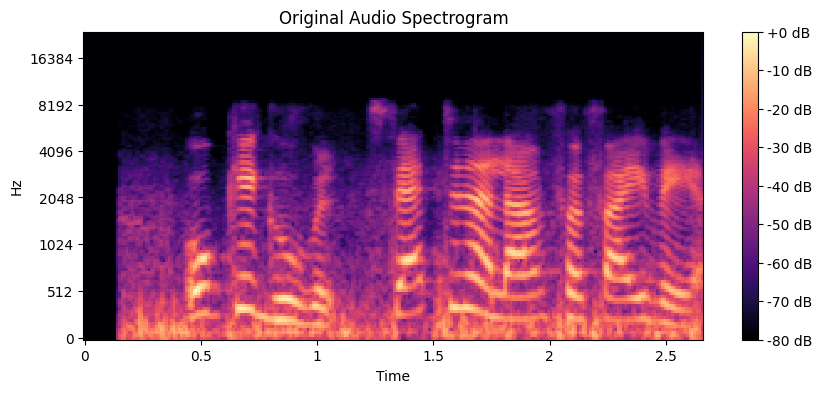

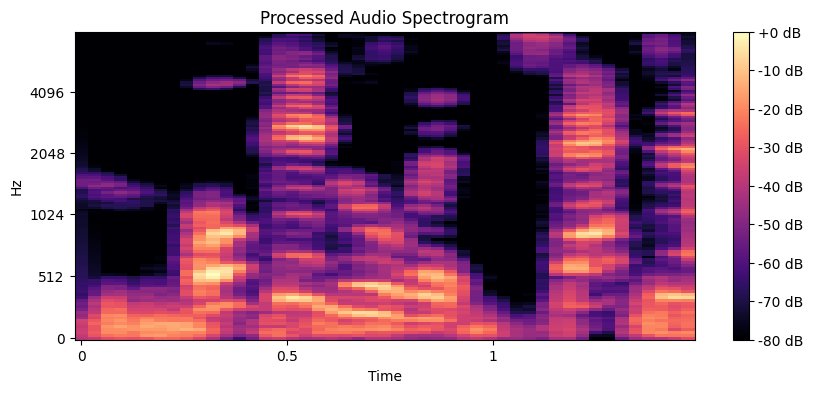

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

def plot_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Compare original and processed spectrograms
plot_spectrogram("/content/drive/MyDrive/SVM/ultrasonic_conversion/audible_test/A1.wav", "Original Audio Spectrogram")
plot_spectrogram("/content/drive/MyDrive/SVM/audio_preprocessing/audible_test/A1.wav", "Processed Audio Spectrogram")

#Before and after audio preprocessing (inaudible)

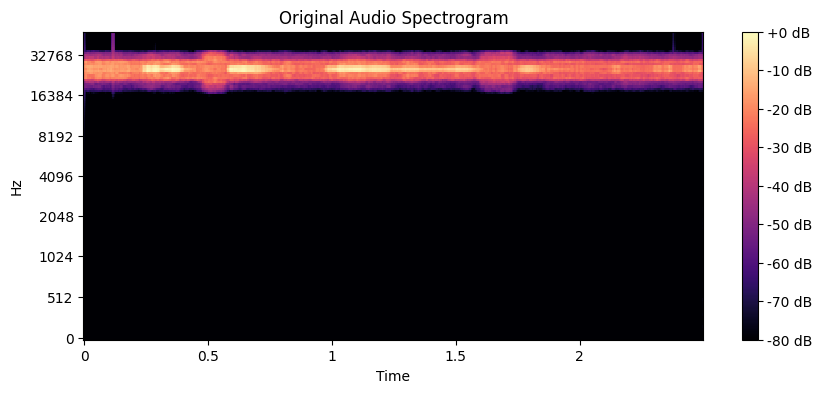

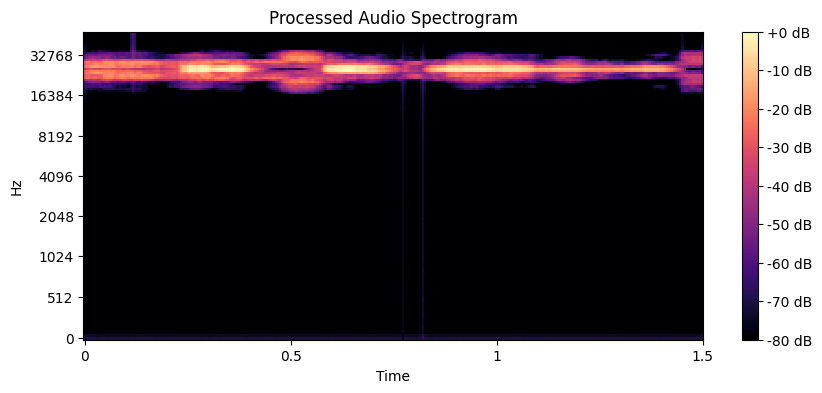

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

def plot_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Compare original and processed spectrograms
plot_spectrogram("/content/drive/MyDrive/SVM/ultrasonic_conversion/inaudible_test/ultrasonic_Q3.wav", "Original Audio Spectrogram")
plot_spectrogram("/content/drive/MyDrive/SVM/audio_preprocessing/inaudible_test/ultrasonic_Q3.wav", "Processed Audio Spectrogram")

#Framing

In [ ]:
import os
import librosa
import numpy as np

def frame_signal(y, sr, frame_duration=0.025, overlap=0.5):
    """
    Frames an audio signal based on a fixed time duration instead of a fixed sample count.

    Parameters:
        y (numpy.ndarray): The audio signal.
        sr (int): Sampling rate of the signal.
        frame_duration (float): Frame length in seconds (default 25ms).
        overlap (float): Overlap ratio between frames (default 50%).

    Returns:
        numpy.ndarray: 2D array where each column is a framed segment.
    """
    frame_size = int(sr * frame_duration)  # Convert duration to samples
    hop_size = int(frame_size * (1 - overlap))  # Calculate hop size based on overlap

    # Convert to frames
    frames = librosa.util.frame(y, frame_length=frame_size, hop_length=hop_size)

    return frames

def process_audio_folder(folder_path, target_sr, output_folder):
    """
    Processes all audio files in a folder, applies framing, and saves the frames as .npy files.

    Parameters:
        folder_path (str): Path to the folder containing audio files.
        target_sr (int): Sampling rate to load audio files.
        output_folder (str): Folder to save framed numpy arrays.
    """
    os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    for file in audio_files:
        file_path = os.path.join(folder_path, file)
        y, sr = librosa.load(file_path, sr=target_sr)  # Load audio with target sampling rate
        frames = frame_signal(y, sr)  # Apply framing

        # Save framed data as .npy file
        output_file = os.path.join(output_folder, file.replace('.wav', '.npy'))
        np.save(output_file, frames)

        print(f"Processed {file}: Frames shape {frames.shape}")

# Define folder paths
audible_folder = "/content/drive/MyDrive/SVM/audio_preprocessing/audible_test/"      # Folder containing audible signals (16kHz)
inaudible_folder = "/content/drive/MyDrive/SVM/audio_preprocessing/inaudible_test/"  # Folder containing inaudible signals (96kHz)

# Define output folders
audible_output = "/content/drive/MyDrive/SVM/framing/audible_test/"
inaudible_output = "/content/drive/MyDrive/SVM/framing/inaudible_test/"

# Process folders
process_audio_folder(audible_folder, 16000, audible_output)
process_audio_folder(inaudible_folder, 96000, inaudible_output)

print("Framing complete for all files!")

Processed A1.wav: Frames shape (400, 119)
Processed A2.wav: Frames shape (400, 119)
Processed A3.wav: Frames shape (400, 119)
Processed A4.wav: Frames shape (400, 119)
Processed A5.wav: Frames shape (400, 119)
Processed B1.wav: Frames shape (400, 119)
Processed B2.wav: Frames shape (400, 119)
Processed B3.wav: Frames shape (400, 119)
Processed B4.wav: Frames shape (400, 119)
Processed B5.wav: Frames shape (400, 119)
Processed C1.wav: Frames shape (400, 119)
Processed C2.wav: Frames shape (400, 119)
Processed C3.wav: Frames shape (400, 119)
Processed C4.wav: Frames shape (400, 119)
Processed C5.wav: Frames shape (400, 119)
Processed C6.wav: Frames shape (400, 119)
Processed C7.wav: Frames shape (400, 119)
Processed C8.wav: Frames shape (400, 119)
Processed C9.wav: Frames shape (400, 119)
Processed C10.wav: Frames shape (400, 119)
Processed C11.wav: Frames shape (400, 119)
Processed C12.wav: Frames shape (400, 119)
Processed C13.wav: Frames shape (400, 119)
Processed C14.wav: Frames shap

#Windowing

In [ ]:
import numpy as np
import os

# Define input and output folder paths separately
audible_input_path = "/content/drive/MyDrive/SVM/framing/audible_test/"  # Update with your folder path
inaudible_input_path = "/content/drive/MyDrive/SVM/framing/inaudible_test/"  # Update with your folder path

audible_output_path = "/content/drive/MyDrive/SVM/windowing/audible_test/"  # Update with your output folder
inaudible_output_path = "/content/drive/MyDrive/SVM/windowing/inaudible_test/" # Update with your output folder

# Ensure output directories exist
os.makedirs(audible_output_path, exist_ok=True)
os.makedirs(inaudible_output_path, exist_ok=True)

def apply_hamming_window(input_folder, output_folder):
    """Apply Hamming windowing to all .npy files in the input folder and save them."""
    file_list = [f for f in os.listdir(input_folder) if f.endswith(".npy")]

    batch_size = 1000  # Adjust for large datasets

    for i in range(0, len(file_list), batch_size):
        batch_files = file_list[i:i + batch_size]  # Process files in batches

        for file_name in batch_files:
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            framed_data = np.load(input_path, mmap_mode='r')  # Memory-mapped loading
            window = np.hamming(framed_data.shape[1])  # Create Hamming window
            windowed_data = framed_data * window  # Apply windowing

            np.save(output_path, windowed_data)  # Save processed data

        print(f"Processed batch {i//batch_size + 1}/{(len(file_list) // batch_size) + 1} in {input_folder}")

print("Processing Audible files...")
apply_hamming_window(audible_input_path, audible_output_path)

print("Processing Inaudible files...")
apply_hamming_window(inaudible_input_path, inaudible_output_path)

print("Hamming windowing applied to all files successfully!")

Processing Audible files...
Processed batch 1/1 in /content/drive/MyDrive/SVM/framing/audible_test/
Processing Inaudible files...
Processed batch 1/1 in /content/drive/MyDrive/SVM/framing/inaudible_test/
Hamming windowing applied to all files successfully!


#Feature Extraction

In [ ]:
import numpy as np
import librosa
import joblib
import os

# Load the pre-trained scaler
scaler = joblib.load("/content/drive/MyDrive/SVM/trained_model/scaler.pkl")

def extract_features_single(file_path, category):
    """Extracts features from a single windowed audio (.npy) with fixed sampling rate based on category."""
    data = np.load(file_path)  # Load framed & windowed audio
    print(f"Loaded {file_path}, Shape: {data.shape}")  # Debugging print

    y = data.flatten() if data.ndim > 1 else data  # Ensure it's 1D

    # Set sampling rate based on category
    sr = 16000 if category == "audible" else 96000
    print(f"✅ Assigned Sampling Rate: {sr}")

    # Spectral features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Temporal features
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    energy = np.square(y).mean()
    entropy = -np.sum(y**2 * np.log2(y**2 + 1e-10))

    # Compute statistical features (Mean, Variance, Skewness, Kurtosis)
    def stats(feature):
        return [np.mean(feature), np.var(feature), np.mean(feature**3), np.mean(feature**4)]

    features = []
    for f in [mfccs, spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rolloff, zero_crossing_rate]:
        features.extend(stats(f))

    features.append(energy)
    features.append(entropy)

    return np.array(features)

# 📌 Paths
audible_dir = "/content/drive/MyDrive/SVM/windowing/audible_test/"
inaudible_dir = "/content/drive/MyDrive/SVM/windowing/inaudible_test/"
output_path = "/content/drive/MyDrive/SVM/feature_extraction/extracted_audio_test_features.npz"

# Process all .npy files
def process_dataset(folder, category):
    data = []
    labels = []
    for file in os.listdir(folder):
        if file.endswith(".npy"):
            file_path = os.path.join(folder, file)
            features = extract_features_single(file_path, category)
            data.append(features)
            labels.append(1 if category == "audible" else 0)  # 1 = Audible, 0 = Inaudible
    return np.array(data), np.array(labels)

# Extract features from both categories
audible_features, audible_labels = process_dataset(audible_dir, "audible")
inaudible_features, inaudible_labels = process_dataset(inaudible_dir, "inaudible")

# Combine datasets
X = np.vstack((audible_features, inaudible_features))
y = np.concatenate((audible_labels, inaudible_labels))

# Normalize features using pre-trained scaler
X_scaled = scaler.transform(X)

# Save the extracted & normalized features
np.savez(output_path, X=X_scaled, y=y)

print(f"✅ Feature extraction completed! Features saved at: {output_path}")

Loaded /content/drive/MyDrive/SVM/windowing/audible_test/A1.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/A2.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/A3.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/A4.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/A5.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/B1.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/B2.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/B3.npy, Shape: (400, 119)
✅ Assigned Sampling Rate: 16000
Loaded /content/drive/MyDrive/SVM/windowing/audible_test/B4.npy, Shape: (400, 11

#Testing

In [ ]:
import numpy as np
import joblib

# 📌 Load the trained SVM model
model_path = "/content/drive/MyDrive/SVM/trained_model/svm_model.pkl"
svm_model = joblib.load(model_path)

# 📌 Load the extracted test features
test_features_path = "/content/drive/MyDrive/SVM/feature_extraction/extracted_audio_test_features.npz"
data = np.load(test_features_path)

X_test = data["X"]  # Extract test features
y_test = data["y"]  # Extract true labels

# 🔥 Make predictions
y_pred = svm_model.predict(X_test)

# 📌 Save predictions
predictions_path = "/content/drive/MyDrive/SVM/feature_extraction/predictions.npy"
np.save(predictions_path, y_pred)

print(f"✅ Testing completed! Predictions saved at: {predictions_path}")

# 📌 Print predictions
for i, pred in enumerate(y_pred):
    label = "Audible" if pred == 1 else "Inaudible"
    print(f"Sample {i + 1}: {label}")

✅ Testing completed! Predictions saved at: /content/drive/MyDrive/SVM/feature_extraction/predictions.npy
Sample 1: Audible
Sample 2: Audible
Sample 3: Audible
Sample 4: Audible
Sample 5: Audible
Sample 6: Audible
Sample 7: Audible
Sample 8: Audible
Sample 9: Audible
Sample 10: Audible
Sample 11: Audible
Sample 12: Audible
Sample 13: Audible
Sample 14: Audible
Sample 15: Audible
Sample 16: Audible
Sample 17: Audible
Sample 18: Audible
Sample 19: Audible
Sample 20: Audible
Sample 21: Audible
Sample 22: Audible
Sample 23: Audible
Sample 24: Audible
Sample 25: Audible
Sample 26: Audible
Sample 27: Audible
Sample 28: Audible
Sample 29: Audible
Sample 30: Audible
Sample 31: Audible
Sample 32: Audible
Sample 33: Audible
Sample 34: Audible
Sample 35: Audible
Sample 36: Audible
Sample 37: Audible
Sample 38: Audible
Sample 39: Audible
Sample 40: Audible
Sample 41: Audible
Sample 42: Audible
Sample 43: Audible
Sample 44: Audible
Sample 45: Audible
Sample 46: Audible
Sample 47: Audible
Sample 48: 

#Validation

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Load the true labels and predictions
test_features_path = "/content/drive/MyDrive/SVM/feature_extraction/extracted_audio_test_features.npz"
predictions_path = "/content/drive/MyDrive/SVM/feature_extraction/predictions.npy"

data = np.load(test_features_path)
y_test = data["y"]
y_pred = np.load(predictions_path)

# 🔥 Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 📌 Print results
print(f" Model Accuracy: {accuracy:.2%}")
print("\n Confusion Matrix:")
print(conf_matrix)
print("\n Classification Report:")
print(class_report)

 Model Accuracy: 100.00%

 Confusion Matrix:
[[115   0]
 [  0 115]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



Loaded previous predictions.


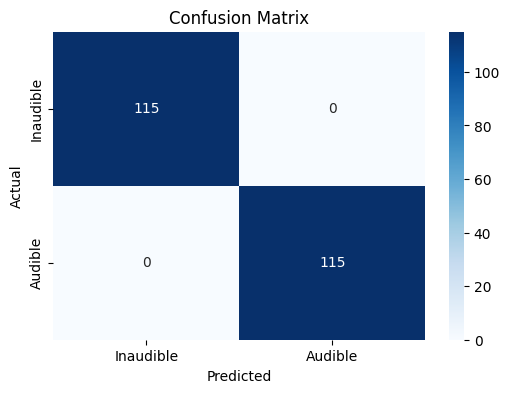

In [ ]:
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load extracted features from NPZ file
data = np.load("/content/drive/MyDrive/SVM/feature_extraction/extracted_audio_test_features.npz")
X = data["X"]
y = data["y"]

# Load trained SVM model
svm_model = joblib.load("/content/drive/MyDrive/SVM/trained_model/svm_model.pkl")

# Load or generate predictions
try:
    y_pred = np.load("/content/drive/MyDrive/SVM/feature_extraction/predictions.npy")  # Load saved predictions
    print("Loaded previous predictions.")
except FileNotFoundError:
    y_pred = svm_model.predict(X)  # Predict if file is missing
    np.save("/content/drive/MyDrive/SVM/feature_extraction/predictions.npy", y_pred)  # Save predictions for future use

# Compute and visualize confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Inaudible", "Audible"], yticklabels=["Inaudible", "Audible"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install scatter

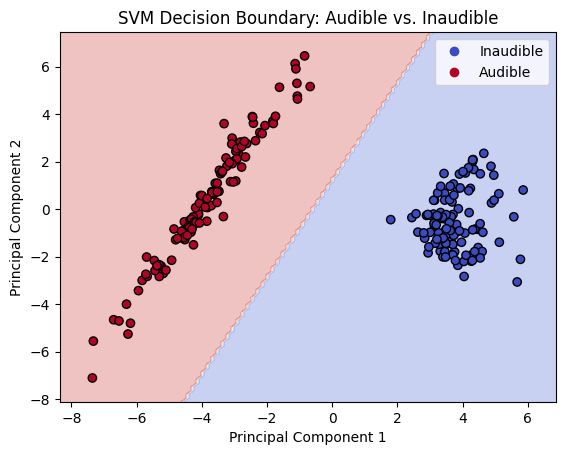

In [ ]:
from sklearn.decomposition import PCA

# Reduce feature space to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the reduced dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM on reduced features
svm_model_pca = SVC(kernel="linear", C=1.0)
svm_model_pca.fit(X_train_pca, y_train)

# Plot decision boundary
w = svm_model_pca.coef_[0]
b = svm_model_pca.intercept_[0]

# Create grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = w[0] * xx + w[1] * yy + b
Z = np.sign(Z)  # Convert to class labels

# Plot hyperplane
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors="k", cmap="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary: Audible vs. Inaudible")
# Add legend
handles, labels = scatter.legend_elements()
plt.legend(handles, ["Inaudible", "Audible"], loc="upper right")
plt.show()

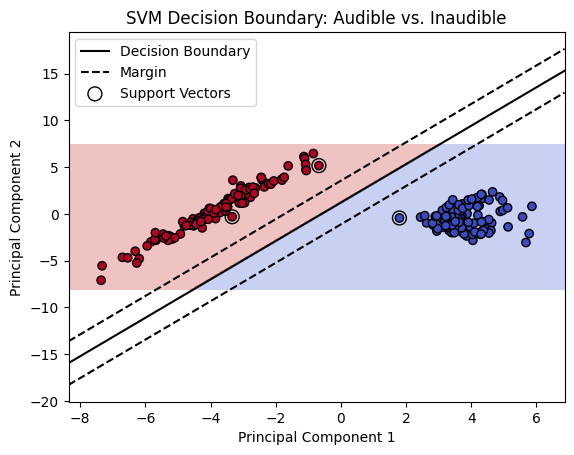

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Reduce feature space to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the reduced dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM on reduced features
svm_model_pca = SVC(kernel="linear", C=1.0)
svm_model_pca.fit(X_train_pca, y_train)

# Get weights and bias
w = svm_model_pca.coef_[0]
b = svm_model_pca.intercept_[0]

# Compute decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = w[0] * xx + w[1] * yy + b
Z = np.sign(Z)  # Convert to class labels

# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors="k", cmap="coolwarm")

# Plot the hyperplane (decision boundary)
x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
plt.plot(x_vals, y_vals, "k-", label="Decision Boundary")

# Calculate margin lines
margin = 1 / np.linalg.norm(w)  # Margin width
y_vals_margin1 = y_vals + (margin * np.sign(w[1]))
y_vals_margin2 = y_vals - (margin * np.sign(w[1]))
plt.plot(x_vals, y_vals_margin1, "k--", label="Margin")
plt.plot(x_vals, y_vals_margin2, "k--")

# Plot support vectors
support_vectors = svm_model_pca.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors="none", edgecolors="black", label="Support Vectors")

# Labels and legend
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary: Audible vs. Inaudible")
# Add legend
handles, labels = scatter.legend_elements()
plt.legend(handles, ["Inaudible", "Audible"], loc="upper right")
plt.legend()
plt.show()